In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold  #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from sklearn.model_selection import train_test_split
%matplotlib inline

/home/ajita/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_df=pd.read_csv("/home/ajita/Documents/AnlytcsVidyaML/bigmartsales/Train_UWu5bXk.csv")
print(train_df.shape)
#print(train_df.info())
#print(train_df.describe())
#print(train_df.head(5))
#print(train_df.tail(5))

(8523, 12)


In [3]:
test_df=pd.read_csv("/home/ajita/Documents/AnlytcsVidyaML/bigmartsales/Test_u94Q5KV.csv")
print(test_df.shape)

(5681, 11)


In [4]:
test_df["Source"]='test'
train_df["Source"]='train'
data_df=pd.concat([train_df,test_df],ignore_index=True)
print(data_df.tail(5))
print(data_df.shape)
print(data_df.info())
q=np.arange(0,data_df.shape[0])
q=np.reshape(q,(q.shape[0],1))
print(q.shape)
data_df["Index"]=q
print("shape of data :",data_df.shape)
#data_df["Index"]=np.arange(0,data_df.shape[0])

      Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
14199          Regular           FDB58  141.3154                NaN   
14200          Regular           FDD47  169.1448                NaN   
14201          Low Fat           NCO17  118.7440                NaN   
14202          Regular           FDJ26  214.6218                NaN   
14203          Regular           FDU37   79.7960                NaN   

                Item_Type  Item_Visibility  Item_Weight  \
14199         Snack Foods         0.013496         10.5   
14200       Starchy Foods         0.142991          7.6   
14201  Health and Hygiene         0.073529         10.0   
14202              Canned         0.000000         15.3   
14203              Canned         0.104720          9.5   

       Outlet_Establishment_Year Outlet_Identifier Outlet_Location_Type  \
14199                       1997            OUT046               Tier 1   
14200                       2009            OUT018               Tie

In [5]:
print(data_df.apply(lambda x:sum(x.isnull()),axis=0))

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
Source                          0
Index                           0
dtype: int64


In [6]:
print(data_df.describe())

           Item_MRP  Item_Outlet_Sales  Item_Visibility   Item_Weight  \
count  14204.000000        8523.000000     14204.000000  11765.000000   
mean     141.004977        2181.288914         0.065953     12.792854   
std       62.086938        1706.499616         0.051459      4.652502   
min       31.290000          33.290000         0.000000      4.555000   
25%       94.012000                NaN         0.027036           NaN   
50%      142.247000                NaN         0.054021           NaN   
75%      185.855600                NaN         0.094037           NaN   
max      266.888400       13086.964800         0.328391     21.350000   

       Outlet_Establishment_Year         Index  
count               14204.000000  14204.000000  
mean                 1997.830681   7101.500000  
std                     8.371664   4100.485947  
min                  1985.000000      0.000000  
25%                  1987.000000   3550.750000  
50%                  1999.000000   7101.500000  

/home/ajita/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


The minimum value of "Item_Visibility" is 0 which is not possible cause when an item is sold it must have occupied some space in the store.

In [7]:

print(data_df.apply(lambda x:len(x.unique()),axis=0))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
Source                           2
Index                        14204
dtype: int64


In [8]:
#filtering categoriacal variables
categorical_values=[x for x in data_df.dtypes.index if data_df.dtypes[x]=='object']
#filtering unecessary variables
categorical_values=[x for x in categorical_values if x not in ["Item_Identifier","Outlet_Identifier","Source"]]
for cols in categorical_values:
    print("Frequency of categories in {0} column".format(cols))
    print(data_df[cols].value_counts())

Frequency of categories in Item_Fat_Content column
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Frequency of categories in Item_Type column
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
Frequency of categories in Outlet_Location_Type column
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
Frequency of categories in Outlet_Size column
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Frequency of c

In [9]:
avg_weight=data_df["Item_Weight"].mean()
print(avg_weight)
data_df["Item_Weight"]=data_df["Item_Weight"].fillna(avg_weight)
print(sum(data_df["Item_Weight"].isnull()))

12.792854228644991
0


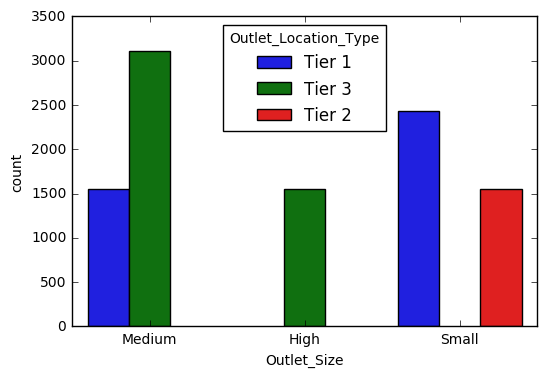

In [10]:
sns.countplot(x="Outlet_Size",hue="Outlet_Location_Type",data=data_df)

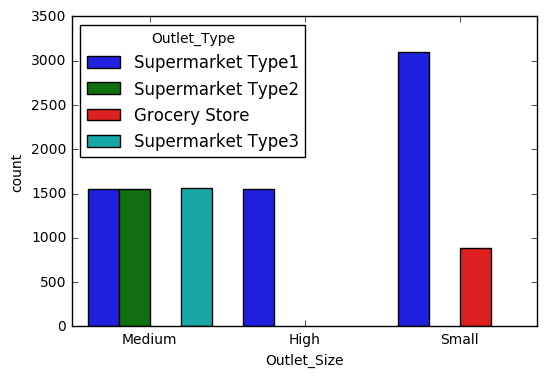

In [11]:
sns.countplot(x="Outlet_Size",hue="Outlet_Type",data=data_df)

In [12]:
f=data_df[["Outlet_Identifier","Outlet_Size"]]
print(f)
print(data_df["Outlet_Identifier"].value_counts())

      Outlet_Identifier Outlet_Size
0                OUT049      Medium
1                OUT018      Medium
2                OUT049      Medium
3                OUT010         NaN
4                OUT013        High
5                OUT018      Medium
6                OUT013        High
7                OUT027      Medium
8                OUT045         NaN
9                OUT017         NaN
10               OUT049      Medium
11               OUT046       Small
12               OUT049      Medium
13               OUT046       Small
14               OUT013        High
15               OUT046       Small
16               OUT018      Medium
17               OUT049      Medium
18               OUT027      Medium
19               OUT035       Small
20               OUT013        High
21               OUT027      Medium
22               OUT035       Small
23               OUT019       Small
24               OUT046       Small
25               OUT017         NaN
26               OUT035     

In [13]:
#from scipy.stats import mode
#determining the mode for each outlet_identifier
#outlet_identifier_mode=data_df.pivot_table(values="Outlet_Size",columns="Outlet_Identifier",
                                           #aggfunc=lambda x:mode(x))
#print(outlet_identifier_mode)
a=data_df[["Outlet_Size","Outlet_Type","Index"]].groupby(["Outlet_Type","Outlet_Size"]).count()
print(a)

                               Index
Outlet_Type       Outlet_Size       
Grocery Store     Small          880
Supermarket Type1 High          1553
                  Medium        1550
                  Small         3100
Supermarket Type2 Medium        1546
Supermarket Type3 Medium        1559


In [14]:
#determining mode for each outlet_type
#outlet_size_mode = data_df.pivot_table(values='Outlet_Size', columns='Outlet_Type',
                                    #aggfunc=(lambda x:mode(x).mode[0]))
'''a=data_df[["Outlet_Size","Outlet_Type","Index"]].groupby(["Outlet_Type","Outlet_Size"]).count()\
                                                                        .nlargest(1,"Index")\
                                                                        
        
print(a)
print(a.index)
print(a)
z=a.xs("Grocery Store",axis=0,level=0)
print(z)
a=z.index
print(a.shape)'''
#print(outlet_size_mode)

'a=data_df[["Outlet_Size","Outlet_Type","Index"]].groupby(["Outlet_Type","Outlet_Size"]).count()                                                                        .nlargest(1,"Index")                                                                        \n        \nprint(a)\nprint(a.index)\nprint(a)\nz=a.xs("Grocery Store",axis=0,level=0)\nprint(z)\na=z.index\nprint(a.shape)'

In [15]:
#accessing the most frequent Outlet_Size for each Outlet_Type
def extract_mode(colname):
    z=a.xs(colname,axis=0,level=0)
    v=z.sort_values(axis=0,by="Index",ascending=False)
    m=v.index
    return(m[0])
dict_mode={}
Outlet_type=pd.unique(data_df["Outlet_Type"])
print(Outlet_type)
l=Outlet_type.shape[0]
for x in range(0,l):
    mode=extract_mode(Outlet_type[x])
    dict_mode[Outlet_type[x]]=mode
print(dict_mode)
    


['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
{'Supermarket Type1': 'Small', 'Grocery Store': 'Small', 'Supermarket Type3': 'Medium', 'Supermarket Type2': 'Medium'}


In [16]:
def fill1(x):
    mkttype=x["Outlet_Type"]
    return dict_mode[mkttype]
v=data_df[data_df["Outlet_Size"].isnull()].apply(fill1,axis=1)
data_df["Outlet_Size"]=data_df["Outlet_Size"].fillna(v)
print(sum(data_df["Outlet_Size"].isnull()))

0


In [17]:
#feature engineering
#checking if combining supermt type2 and supermkt type3 is reasonable or not
table2=data_df.pivot_table(values="Item_Outlet_Sales",columns="Outlet_Type")
print(table2)

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64


Since there is a significant difference in the mean values of both.So its better to keep them separated

In [18]:
#modifying the item_visisbility
zerov=(data_df["Item_Visibility"]==0.000)
print(sum(zerov))

879


So initially there are 879 items with 0.0000 visibility

In [19]:
table3=data_df.pivot_table(values="Item_Visibility",columns="Item_Identifier")
print(table3.shape)

(1559,)


In [20]:
data_df.loc[zerov,"Item_Visibility"]=data_df.loc[zerov,"Item_Identifier"].apply(lambda x:table3[x])
print(sum(data_df["Item_Visibility"]==0.000))
#rmoved all the zero visibility values

0


In [21]:
#Item_Visibility_Meanratio calculates the visibility of the item in a particular store.As some stores give 
#preferences to items accordingly.
data_df['Item_Visibility_MeanRatio'] = data_df.apply(lambda x: x['Item_Visibility']/table3[x['Item_Identifier']], axis=1)
print (data_df['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [22]:


#broad category of item_Type
data_df["Item_type_combined"]=data_df["Item_Identifier"].apply(lambda x:x[0:2])
data_df["Item_type_combined"]=data_df["Item_type_combined"].map({"FD":"Food","NC":"Non_Consumable",
                                                                "DR":"Drinks"})
print(data_df["Item_type_combined"].value_counts())

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_type_combined, dtype: int64


In [23]:

#years of operation of a store
data_df["Outlet_years"]=2013-data_df["Outlet_Establishment_Year"]
print(data_df["Outlet_years"].describe())

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_years, dtype: float64


In [24]:
#modifying the values in fat_categories
print(data_df["Item_Fat_Content"].value_counts())
data_df["Item_Fat_Content"]=data_df["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
print(data_df["Item_Fat_Content"].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [25]:
#Non_consumable items cant have a fat_content.So in the category of Item_fat_content a separate category 
#should be there for non_consumables
data_df.loc[data_df["Item_type_combined"]=="Non_Consumable","Item_Fat_Content"]="Non_Edible"
print(data_df["Item_Fat_Content"].value_counts())

Low Fat       6499
Regular       5019
Non_Edible    2686
Name: Item_Fat_Content, dtype: int64


In [26]:
le=LabelEncoder()
data_df["Outlet"]=le.fit_transform(data_df["Outlet_Identifier"])
var=["Outlet","Item_Fat_Content","Item_type_combined","Outlet_Type","Outlet_Size","Outlet_Location_Type"]
for i in var:
    data_df[i]=le.fit_transform(data_df[i])


In [27]:


print(data_df.head(5))

   Item_Fat_Content Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0                 0           FDA15  249.8092          3735.1380   
1                 2           DRC01   48.2692           443.4228   
2                 0           FDN15  141.6180          2097.2700   
3                 2           FDX07  182.0950           732.3800   
4                 1           NCD19   53.8614           994.7052   

               Item_Type  Item_Visibility  Item_Weight  \
0                  Dairy         0.016047         9.30   
1            Soft Drinks         0.019278         5.92   
2                   Meat         0.016760        17.50   
3  Fruits and Vegetables         0.017834        19.20   
4              Household         0.009780         8.93   

   Outlet_Establishment_Year Outlet_Identifier  Outlet_Location_Type  \
0                       1999            OUT049                     0   
1                       2009            OUT018                     2   
2                       19

In [28]:


#one-hot-encoding
data_df=pd.get_dummies(data_df,columns=var)
print(data_df.head(5))
print(data_df.dtypes)

  Item_Identifier  Item_MRP  Item_Outlet_Sales              Item_Type  \
0           FDA15  249.8092          3735.1380                  Dairy   
1           DRC01   48.2692           443.4228            Soft Drinks   
2           FDN15  141.6180          2097.2700                   Meat   
3           FDX07  182.0950           732.3800  Fruits and Vegetables   
4           NCD19   53.8614           994.7052              Household   

   Item_Visibility  Item_Weight  Outlet_Establishment_Year Outlet_Identifier  \
0         0.016047         9.30                       1999            OUT049   
1         0.019278         5.92                       2009            OUT018   
2         0.016760        17.50                       1999            OUT049   
3         0.017834        19.20                       1998            OUT010   
4         0.009780         8.93                       1987            OUT013   

  Source  Index           ...            Outlet_Type_0  Outlet_Type_1  \
0  trai

In [29]:
#drop the unecessary columns
data_df.drop(["Item_Type","Outlet_Establishment_Year"],axis=1,inplace=True)
#divide them back into train and test
train_df=data_df.loc[data_df["Source"]=="train"]
test_df=data_df.loc[data_df["Source"]=="test"]

#removing unecessary columns in both dtypes
train_df.drop(["Source","Index"],axis=1,inplace=True)
test_df.drop(["Source","Item_Outlet_Sales","Index"],axis=1,inplace=True)

train_df.to_csv("train_modified",index=False)
test_df.to_csv("test_modified",index=False)

/home/ajita/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/ajita/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [30]:
#baseline model
mean_sales=train_df["Item_Outlet_Sales"].mean()
base1=test_df[["Item_Identifier","Outlet_Identifier"]]
base1["Item_Outlet_Sales"]=mean_sales
print(base1.head(10))

     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
8523           FDW58            OUT049        2181.288914
8524           FDW14            OUT017        2181.288914
8525           NCN55            OUT010        2181.288914
8526           FDQ58            OUT017        2181.288914
8527           FDY38            OUT027        2181.288914
8528           FDH56            OUT046        2181.288914
8529           FDL48            OUT018        2181.288914
8530           FDC48            OUT027        2181.288914
8531           FDN33            OUT045        2181.288914
8532           FDA36            OUT017        2181.288914


/home/ajita/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [31]:
from sklearn import model_selection,metrics
target=["Item_Outlet_Sales"]
Idcol=["Item_Identifier","Outlet_Identifier"]
def Kfold(model,dtrain,target,variables):
    model.fit(dtrain[variables],dtrain[target])
    predictions=model.predict(dtrain[variables])
    error=metrics.mean_squared_error(dtrain[target],predictions)
    print("the error on train set is {0}".format(np.sqrt(np.abs(error))))
    kf=KFold(dtrain.shape[0],n_folds=8)
    error=[]
    for train,test  in kf:
        train_data=dtrain[variables].iloc[train,:]
        test_data=dtrain[variables].iloc[test,:]
        train_y=dtrain[target].iloc[train]
        test_y=dtrain[target].iloc[test]
        model.fit(train_data,train_y)
        predictions=model.predict(test_data)
        error.append(metrics.mean_squared_error(test_y,predictions))
        error_val=np.mean(error)
    print("cross_validation error is {0}".format(np.sqrt(error_val)))   

the error on train set is 1127.3778004641688
cross_validation error is 1129.8551503540596


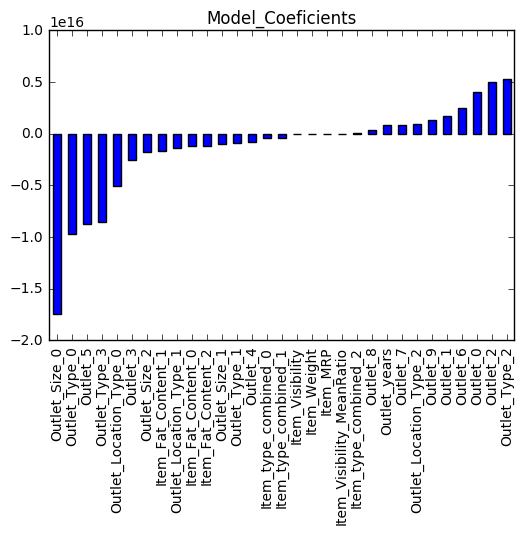

In [32]:
#regression model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
target=["Item_Outlet_Sales"]
Idcol=["Item_Identifier","Outlet_Identifier"]
variables=[x for x in train_df.columns if x not in target+Idcol]
model1=LinearRegression(normalize=True)
Kfold(model1,train_df,target,variables)
coefs=np.reshape(model1.coef_,(model1.coef_.shape[1],))
coef1=pd.Series(coefs,variables).sort_values()
coef1.plot(kind="bar",title="Model_Coeficients")

the error on train set is 1128.6226696435676
cross_validation error is 1131.0210502157695


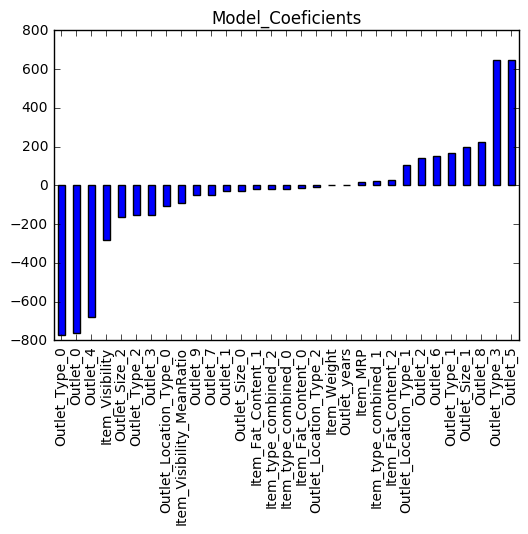

In [33]:
from sklearn.linear_model import Ridge
model2=Ridge(alpha=0.05,normalize=True)
Kfold(model2,train_df,target,variables)
coefs=np.reshape(model2.coef_,(model2.coef_.shape[1],))
coef2=pd.Series(coefs,variables).sort_values()
coef2.plot(kind="bar",title="Model_Coeficients")

In [34]:
from sklearn.tree import DecisionTreeRegressor
#variables=["Item_Visibility","Outlet_Type_0","Item_Visibility_MeanRatio","Outlet_5","Outlet_Size_1",
          #"Item_Weight","Outlet_years","Item_MRP","Outlet_Type_3","Outlet_Type_1"]
model3=DecisionTreeRegressor(max_depth=15,min_samples_leaf=120)
Kfold(model3,train_df,target,variables)
x=model3.feature_importances_
v=zip(variables,x)
q=dict(v)
print()
for keys in q.keys():
    print(keys,":",q[keys])


the error on train set is 1061.4955093978722
cross_validation error is 1094.3695765127927

Outlet_Location_Type_2 : 0.0
Outlet_4 : 0.0
Item_type_combined_2 : 0.0
Outlet_0 : 0.0
Outlet_Type_3 : 0.0211685707354
Outlet_Size_0 : 0.0
Item_Fat_Content_0 : 0.0
Item_Fat_Content_2 : 0.0
Outlet_Type_0 : 0.315517421485
Outlet_Size_2 : 0.0
Outlet_Size_1 : 0.000381768675249
Item_Visibility : 0.00405673321115
Outlet_1 : 0.0
Outlet_3 : 0.0
Outlet_9 : 0.0
Item_Fat_Content_1 : 0.0
Item_Weight : 0.00214967462918
Item_Visibility_MeanRatio : 0.000227843829231
Outlet_5 : 0.0982020408423
Outlet_7 : 0.0
Item_MRP : 0.551570109608
Item_type_combined_1 : 0.0
Outlet_Location_Type_1 : 0.0
Item_type_combined_0 : 0.0
Outlet_Type_1 : 0.0
Outlet_years : 0.00588518538781
Outlet_6 : 0.0
Outlet_8 : 0.0
Outlet_2 : 0.0
Outlet_Location_Type_0 : 0.0
Outlet_Type_2 : 0.000840651596674


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model4=RandomForestRegressor(max_depth=6,n_estimators=100,min_samples_split=5)
target='Item_Outlet_Sales'
Kfold(model4,train_df,target,variables)
x=model4.feature_importances_
q=zip(variables,x)
v=dict(q)
print()
for keys in v.keys():
    print(keys,":",v[keys])
'''n_estimators=[x for x in range(100,2000,100)]
max_depth=[x for x in range(5,100,5)]
min_samples_split=[2,5,8,10]
max_features=['auto','sqrt']
min_samples_leaf=[1,2,5]
random_grid={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,
            'max_features':max_features,'min_samples_leaf':min_samples_leaf}
model4=RandomForestRegressor()
#apply on 5fold and 100 diff random combinations of parameters
model4_random = RandomizedSearchCV(estimator = model4, param_distributions = random_grid, n_iter = 20, 
                              cv = 5,n_jobs = -1)
#fit the random model
target="Item_Outlet_Sales"
model4_random.fit(train_df[variables],train_df[target])
print(model4.best_params_)'''


the error on train set is 1051.709477849802
cross_validation error is 1086.448220816017

Outlet_Location_Type_2 : 0.0001881274054
Outlet_4 : 3.63322475304e-06
Item_type_combined_2 : 4.37603852208e-05
Outlet_0 : 3.01705201525e-06
Outlet_Type_3 : 0.0431927849913
Outlet_Size_0 : 6.24795373226e-05
Item_Fat_Content_0 : 0.000293319480319
Item_Fat_Content_2 : 0.000200999894736
Outlet_Type_0 : 0.307445469505
Outlet_Size_2 : 3.25702816145e-05
Outlet_Size_1 : 3.33966866965e-05
Item_Visibility : 0.0092684906437
Outlet_1 : 7.50369654664e-06
Outlet_3 : 0.000593790281774
Outlet_9 : 4.16013562429e-05
Item_Fat_Content_1 : 0.000181992161711
Item_Weight : 0.00221720334314
Item_Visibility_MeanRatio : 0.00342096627815
Outlet_5 : 0.0394504643694
Outlet_7 : 5.31922256249e-05
Item_MRP : 0.551056590497
Item_type_combined_1 : 0.000287092610188
Outlet_Location_Type_1 : 3.4116595525e-05
Item_type_combined_0 : 0.000251253001547
Outlet_Type_1 : 0.00112926340632
Outlet_years : 0.0397935409932
Outlet_6 : 0.000100090

'n_estimators=[x for x in range(100,2000,100)]\nmax_depth=[x for x in range(5,100,5)]\nmin_samples_split=[2,5,8,10]\nmax_features=[\'auto\',\'sqrt\']\nmin_samples_leaf=[1,2,5]\nrandom_grid={\'n_estimators\':n_estimators,\'max_depth\':max_depth,\'min_samples_split\':min_samples_split,\n            \'max_features\':max_features,\'min_samples_leaf\':min_samples_leaf}\nmodel4=RandomForestRegressor()\n#apply on 5fold and 100 diff random combinations of parameters\nmodel4_random = RandomizedSearchCV(estimator = model4, param_distributions = random_grid, n_iter = 20, \n                              cv = 5,n_jobs = -1)\n#fit the random model\ntarget="Item_Outlet_Sales"\nmodel4_random.fit(train_df[variables],train_df[target])\nprint(model4.best_params_)'

In [36]:
from sklearn.ensemble import AdaBoostRegressor
model5=AdaBoostRegressor(n_estimators=30,base_estimator=model3,learning_rate=0.25)
Kfold(model5,train_df,target,variables)



the error on train set is 1032.1636993993654
cross_validation error is 1098.3289020153527


In [37]:
from sklearn.ensemble import GradientBoostingRegressor
model6=GradientBoostingRegressor(learning_rate=0.25,max_depth=2.0)
Kfold(model6,train_df,target,variables)

the error on train set is 1041.1277067523974
cross_validation error is 1088.121077245158


In [38]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':range(20,81,5)}
model8_random=GridSearchCV(estimator=model6,param_grid=params,cv=5,scoring='neg_mean_squared_error')
target="Item_Outlet_Sales"
model8_random.fit(train_df[variables],train_df[target])
print(model8_random.best_params_)
print(model8_random.best_score_)

{'n_estimators': 25}
-1172795.44311


In [39]:
model7F=GradientBoostingRegressor(max_depth=2.0,n_estimators=25,learning_rate=0.25)
Kfold(model7F,train_df,target,variables)

the error on train set is 1066.7126967621837
cross_validation error is 1081.4010114106381


In [40]:
model7_3=GradientBoostingRegressor(n_estimators=25,learning_rate=0.25)
#Kfold(model7_3,train_df,target,variables)

In [41]:
params={'max_depth':range(2,15,2),'min_samples_split':range(10,100,10)}
model7_3random=GridSearchCV(estimator=model7_3,param_grid=params,cv=5,scoring='neg_mean_squared_error')
model7_3random.fit(train_df[variables],train_df[target])
print(model7_3random.best_params_)
print(model7_3random.best_score_)

{'min_samples_split': 50, 'max_depth': 2}
-1172744.24941


In [42]:
model7_3F=GradientBoostingRegressor(n_estimators=25,learning_rate=0.25,max_depth=2,min_samples_split=40)
Kfold(model7_3F,train_df,target,variables)

the error on train set is 1066.7126967621837
cross_validation error is 1081.401011410638


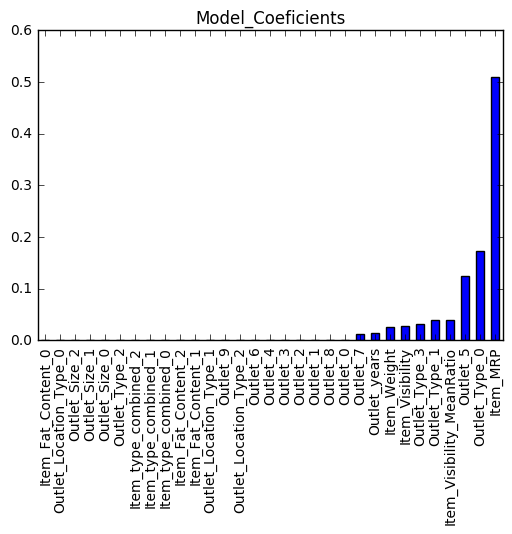

In [43]:
x=model7_3F.feature_importances_
coef1=pd.Series(x,variables).sort_values()
coef1.plot(kind="bar",title="Model_Coeficients")

In [44]:
variables1=["Item_MRP","Outlet_Type_0","Outlet_Type_3","Outlet_5","Item_Visibility_MeanRatio","Outlet_Type_1",
          "Item_Visibility","Item_Weight","Outlet_years","Outlet_7"]
model7_4F=GradientBoostingRegressor(n_estimators=25,learning_rate=0.25,max_depth=2,min_samples_split=40)
Kfold(model7_4F,train_df,target,variables1)

the error on train set is 1066.812908181261
cross_validation error is 1080.7519270834816


In [45]:
params={'subsample':[x/100 for x in range(40,100,5)]}
model7_5random=GridSearchCV(estimator=model7_4F,param_grid=params,cv=5,scoring='neg_mean_squared_error')
model7_5random.fit(train_df[variables1],train_df[target])
print(model7_5random.best_params_)
print(model7_5random.best_score_)

{'subsample': 0.95}
-1173016.31422


In [46]:
model7_5F=GradientBoostingRegressor(n_estimators=25,learning_rate=0.25,max_depth=2,min_samples_split=40,
                                   subsample=1.0)
Kfold(model7_5F,train_df,target,variables1)

the error on train set is 1066.812908181261
cross_validation error is 1080.7519270834816


In [47]:
model7_5F.fit(train_df[variables1],train_df[target])
print(model7_5F.score(train_df[variables1],train_df[target]))
y_test=model7_5F.predict(test_df[variables1])
print(y_test)

0.609145521332
[ 1657.64700902  1299.47029597   720.04602538 ...,  1858.18156305
  3507.68625156  1284.10353974]


In [48]:
final_data=test_df.loc[:,["Item_Identifier","Outlet_Identifier"]]
final_data["Item_Outlet_Sales"]=y_test
print(final_data.head(10))
print(final_data.shape)

     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
8523           FDW58            OUT049        1657.647009
8524           FDW14            OUT017        1299.470296
8525           NCN55            OUT010         720.046025
8526           FDQ58            OUT017        2560.748883
8527           FDY38            OUT027        5799.511458
8528           FDH56            OUT046        1902.690834
8529           FDL48            OUT018         561.903068
8530           FDC48            OUT027        2324.235910
8531           FDN33            OUT045        1515.936059
8532           FDA36            OUT017        3167.983139
(5681, 3)


Changing the values of subsamples dont doesnt improve the cv_Error.

In [49]:
import csv
final_data.to_csv("final_soln.csv",encoding="utf-8")

In [62]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model7=XGBRegressor(max_depth=5,subsample=0.8,colsample_bytree=0.8,learning_rate=0.1,gamma=0)
Kfold(model7,train_df,target,variables)

the error on train set is 948.7196463710067
cross_validation error is 1100.2047687072243


In [56]:
from sklearn import metrics
import pandas as pd
'''def modelfit(alg,train_df,target,variables,esr=50,useTraincv=True,cvfolds=5):
    if useTraincv:
        params=alg.get_xgb_params()
        xgbtrain=xgb.DMatrix(train_df[variables].values,train_df[target].values)
        xgbCV=xgb.cv(params,xgbtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cvfolds,
                    metrics='auc',early_stopping_rounds=esr)
        alg.set_params(n_estimators=xgbCV.shape[0])
        #fit the algorithm
    alg.fit(train_df[variables],train_df[target],metrics='auc')
        #Predict training set:
    dtrain_predictions = alg.predict(train_df[variables])
    dtrain_predprob = alg.predict_proba(train_df[varaibles])[:,1]
    print("Acuuracy:",metrics.accuracy_score(train_df[target],dtrain_predictions))
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')'''
    

'def modelfit(alg,train_df,target,variables,esr=50,useTraincv=True,cvfolds=5):\n    if useTraincv:\n        params=alg.get_xgb_params()\n        xgbtrain=xgb.DMatrix(train_df[variables].values,train_df[target].values)\n        xgbCV=xgb.cv(params,xgbtrain,num_boost_round=alg.get_params()[\'n_estimators\'],nfold=cvfolds,\n                    metrics=\'auc\',early_stopping_rounds=esr)\n        alg.set_params(n_estimators=xgbCV.shape[0])\n        #fit the algorithm\n    alg.fit(train_df[variables],train_df[target],metrics=\'auc\')\n        #Predict training set:\n    dtrain_predictions = alg.predict(train_df[variables])\n    dtrain_predprob = alg.predict_proba(train_df[varaibles])[:,1]\n    print("Acuuracy:",metrics.accuracy_score(train_df[target],dtrain_predictions))\n    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)\n    feat_imp.plot(kind=\'bar\', title=\'Feature Importances\')\n    plt.ylabel(\'Feature Importance Score\')'

In [59]:
params={'n_estimators':range(100,1000,100)}
gsearch=GridSearchCV(estimator=model7,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gsearch.fit(train_df[variables],train_df[target])
print(gsearch.best_params_)
print(gsearch.best_score_)

{'n_estimators': 100}
-1218651.12573


In [61]:
model7_1F=XGBRegressor(max_depth=5,subsample=0.8,colsample_bytree=0.8,learning_rate=0.1,gamma=0,n_estimators=100)
Kfold(model7_1F,train_df,target,variables)

the error on train set is 948.7196463710067
cross_validation error is 1100.2047687072243


In [65]:
params1={'max_depth':range(3,10)}
gsearch2=GridSearchCV(estimator=model7_1F,param_grid=params1,cv=5,scoring='neg_mean_squared_error')
gsearch2.fit(train_df[variables],train_df[target])
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'max_depth': 3}
-1175621.08386


In [64]:
model7_2F=XGBRegressor(max_depth=3,subsample=0.8,colsample_bytree=0.8,learning_rate=0.1,gamma=0,n_estimators=100)
Kfold(model7_2F,train_df,target,variables)

the error on train set is 1033.373289058798
cross_validation error is 1083.0900676434715


In [68]:
params2={'learning_rate':[x/100 for x in range(1,50,5)]}
gsearch3=GridSearchCV(estimator=model7,param_grid=params2,cv=5,scoring='neg_mean_squared_error')
gsearch3.fit(train_df[variables],train_df[target])
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'learning_rate': 0.06}
-1188792.90149


In [69]:
model7_3F=XGBRegressor(max_depth=3,subsample=0.8,colsample_bytree=0.8,learning_rate=0.06,gamma=0,
                       n_estimators=100)
Kfold(model7_3F,train_df,target,variables)

the error on train set is 1051.6307328343178
cross_validation error is 1081.5598569702013


In [75]:
params3={'subsample':[x/100 for x in range(50,100,5)],'colsample_bytree':[x/100 for x in range(50,100,5)]}
gsearch4=GridSearchCV(estimator=model7_3F,param_grid=params3,cv=5,scoring='neg_mean_squared_error')
gsearch4.fit(train_df[variables],train_df[target])
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'colsample_bytree': 0.95, 'subsample': 0.9}
-1168598.76367


In [78]:
model7_4F=XGBRegressor(max_depth=3,subsample=0.7,colsample_bytree=0.8,learning_rate=0.06,gamma=0,
                       n_estimators=100)
Kfold(model7_4F,train_df,target,variables)

the error on train set is 1051.412121509453
cross_validation error is 1080.0328731669138


In [80]:
y_test2=model7_4F.predict(test_df[variables])
print(y_test2)
final_data2=test_df.loc[:,["Item_Identifier","Outlet_Identifier"]]
final_data2["Item_Outlet_Sales"]=y_test2
print(final_data2.head(10))
print(final_data2.shape)
final_data2.to_csv("final_soln2.csv",encoding='utf-8')

[ 1587.7265625   1349.89941406   623.56274414 ...,  1814.12805176
  3467.20385742  1253.39074707]
     Item_Identifier Outlet_Identifier  Item_Outlet_Sales
8523           FDW58            OUT049        1587.726562
8524           FDW14            OUT017        1349.899414
8525           NCN55            OUT010         623.562744
8526           FDQ58            OUT017        2418.634277
8527           FDY38            OUT027        5976.165039
8528           FDH56            OUT046        1911.231689
8529           FDL48            OUT018         604.204468
8530           FDC48            OUT027        2044.534912
8531           FDN33            OUT045        1512.952515
8532           FDA36            OUT017        3165.084473
(5681, 3)


In [74]:
params4={'gamma':[x/10 for x in range(0,5)]}
gsearch5=GridSearchCV(estimator=model7_4F,param_grid=params4,cv=5,scoring='neg_mean_squared_error')
gsearch5.fit(train_df[variables],train_df[target])
print(gsearch5.best_params_)
print(gsearch5.best_score_)

{'gamma': 0.0}
-1169919.79632


In [77]:
model8_2F=XGBRegressor(max_depth=3,subsample=0.9,colsample_bytree=0.95,learning_rate=0.06,gamma=0,
                       n_estimators=100)
Kfold(model8_2F,train_df,target,variables)

the error on train set is 1050.551209612315
cross_validation error is 1080.338572768384


In [81]:
params5={'reg_alpha':[0.0001,0.001,0.01,0.1,1]}
gsearch6=GridSearchCV(estimator=model8_2F,param_grid=params5,cv=5,scoring='neg_mean_squared_error')
gsearch6.fit(train_df[variables],train_df[target])
print(gsearch6.best_params_)
print(gsearch6.best_score_)

{'reg_alpha': 1}
-1168382.65464


In [82]:
model8_3F=XGBRegressor(max_depth=3,subsample=0.9,colsample_bytree=0.95,learning_rate=0.06,gamma=0,
                       n_estimators=100,reg_alpha=1)
Kfold(model8_3F,train_df,target,variables)

the error on train set is 1050.5520027994364
cross_validation error is 1080.338304271907


In [83]:
from sklearn import svm
model9=svm.SVR()
Kfold(model9,train_df,target,variables)

the error on train set is 1733.4808197757286
cross_validation error is 1736.5791392984274
